<a href="https://colab.research.google.com/github/Richaa06/Megha_Singh_Github.io/blob/main/Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.	Implement a Naive Bayes classifier.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.9777777777777777
Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



# 2.	Implement a simple neural network from scratch.


In [ ]:
import numpy as np
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return z * (1 - z)

def binary_cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Initialize parameters
def initialize_parameters(input_size, hidden_size, output_size):
    W1 = np.random.randn(input_size, hidden_size) * 0.01
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * 0.01
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

# Forward propagation
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

# Backward propagation
def backward_propagation(X, y, Z1, A1, Z2, A2, W1, W2):
    m = X.shape[0]
    dZ2 = A2 - y
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    dZ1 = np.dot(dZ2, W2.T) * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    return dW1, db1, dW2, db2

# Update parameters
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

# Neural network model
def neural_network(X, y, hidden_size, epochs, learning_rate):
    input_size = X.shape[1]
    output_size = 1
    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)

    for epoch in range(epochs):

        Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)
        loss = binary_cross_entropy(y, A2)
        dW1, db1, dW2, db2 = backward_propagation(X, y, Z1, A1, Z2, A2, W1, W2)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

        if epoch % 1000 == 0:
            print(f'Epoch {epoch}, Loss: {loss}')

    return W1, b1, W2, b2

# Make predictions
def predict(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(X, W1, b1, W2, b2)
    return (A2 > 0.5).astype(int)


from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split


X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
y = y.reshape(-1, 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


hidden_size = 5
epochs = 10000
learning_rate = 0.01
W1, b1, W2, b2 = neural_network(X_train, y_train, hidden_size, epochs, learning_rate)


y_pred_train = predict(X_train, W1, b1, W2, b2)
y_pred_test = predict(X_test, W1, b1, W2, b2)


train_accuracy = np.mean(y_pred_train == y_train) * 100
test_accuracy = np.mean(y_pred_test == y_test) * 100

print(f'Train Accuracy: {train_accuracy:.2f}%')
print(f'Test Accuracy: {test_accuracy:.2f}%')


Epoch 0, Loss: 0.6931337032861488
Epoch 1000, Loss: 0.6930646792885117
Epoch 2000, Loss: 0.6927396291458465
Epoch 3000, Loss: 0.6911540209327321
Epoch 4000, Loss: 0.6836530677254027
Epoch 5000, Loss: 0.6527604859912236
Epoch 6000, Loss: 0.5706332655120893
Epoch 7000, Loss: 0.46876474069878094
Epoch 8000, Loss: 0.40109835739581085
Epoch 9000, Loss: 0.362882250378423
Train Accuracy: 84.62%
Test Accuracy: 81.50%


# Implement a system for sentiment analysis.

In [ ]:
!pip install textblob



In [ ]:
from textblob import TextBlob

# Function to analyze sentiment
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Get user input
text = input("Please enter the text for sentiment analysis: ")

# Analyze sentiment
polarity, subjectivity = analyze_sentiment(text)

# Display results
print(f"\nText: {text}")
print(f"Sentiment Polarity: {polarity}")
print(f"Sentiment Subjectivity: {subjectivity}")

# Interpretation
if polarity > 0:
    sentiment = "Positive"
elif polarity < 0:
    sentiment = "Negative"
else:
    sentiment = "Neutral"

print(f"Overall Sentiment: {sentiment}")


Please enter the text for sentiment analysis: hello good morning.

Text: hello good morning.
Sentiment Polarity: 0.7
Sentiment Subjectivity: 0.6000000000000001
Overall Sentiment: Positive


# Implement a system for emotion detection from text.

In [ ]:
!pip install transformers torch


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

# Load pre-trained model and tokenizer
model_name = "bhadresh-savani/bert-base-uncased-emotion"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

# Define the emotion labels
emotion_labels = ["anger"]
emotion_labels = ["joy"]
emotion_labels = ["love"]
emotion_labels = ["sadness"]
emotion_labels = ["fear"]
emotion_labels = ["surprise"]
# Create a pipeline for emotion detection
emotion_classifier = pipeline("text-classification", model=model, tokenizer=tokenizer, return_all_scores=True)

# Function to detect emotions
def detect_emotion(text):
    results = emotion_classifier(text)
    emotions = {label['label']: label['score'] for label in results[0]}
    return emotions

# Test the function
text = "I am feeling very happy today!"
emotions = detect_emotion(text)
print(f"Detected emotions: {emotions}")


Detected emotions: {'sadness': 0.0002447018923703581, 'joy': 0.9991065859794617, 'love': 0.0002579885476734489, 'anger': 9.174027218250558e-05, 'fear': 8.430235175183043e-05, 'surprise': 0.00021458569972310215}


/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


# Implement a Q-learning algorithm for a simple game.

In [ ]:
import numpy as np
import random

# Define the environment
class GridWorld:
    def __init__(self, grid_size, start, goal, obstacles):
        self.grid_size = grid_size
        self.start = start
        self.goal = goal
        self.obstacles = obstacles
        self.reset()

    def reset(self):
        self.agent_position = self.start
        return self.agent_position

    def step(self, action):
        if action == 0:   # Up
            next_position = (self.agent_position[0] - 1, self.agent_position[1])
        elif action == 1: # Down
            next_position = (self.agent_position[0] + 1, self.agent_position[1])
        elif action == 2: # Left
            next_position = (self.agent_position[0], self.agent_position[1] - 1)
        elif action == 3: # Right
            next_position = (self.agent_position[0], self.agent_position[1] + 1)

        if (next_position[0] >= 0 and next_position[0] < self.grid_size[0] and
            next_position[1] >= 0 and next_position[1] < self.grid_size[1] and
            next_position not in self.obstacles):
            self.agent_position = next_position
        else:
            next_position = self.agent_position

        if self.agent_position == self.goal:
            reward = 1
            done = True
        else:
            reward = -0.1
            done = False

        return next_position, reward, done

    def get_state(self):
        return self.agent_position

# Q-learning algorithm
def q_learning(env, num_episodes, alpha, gamma, epsilon):
    q_table = np.zeros((env.grid_size[0], env.grid_size[1], 4))

    for episode in range(num_episodes):
        state = env.reset()

        done = False
        while not done:
            if random.uniform(0, 1) < epsilon:
                action = random.randint(0, 3) # Explore: select a random action
            else:
                action = np.argmax(q_table[state[0], state[1]]) # Exploit: select the action with max value

            next_state, reward, done = env.step(action)
            old_value = q_table[state[0], state[1], action]
            next_max = np.max(q_table[next_state[0], next_state[1]])

            new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
            q_table[state[0], state[1], action] = new_value

            state = next_state

    return q_table

# Define parameters
grid_size = (5, 5)
start = (0, 0)
goal = (4, 4)
obstacles = [(1, 1), (2, 2), (3, 3)]
num_episodes = 1000
alpha = 0.1
gamma = 0.6
epsilon = 0.1

# Create environment
env = GridWorld(grid_size, start, goal, obstacles)

# Train the agent using Q-learning
q_table = q_learning(env, num_episodes, alpha, gamma, epsilon)

# Display the Q-table
print("Q-table after training:")
print(q_table)


Q-table after training:
[[[-0.22835764 -0.215008   -0.22851236 -0.22055639]
  [-0.20464601 -0.2043858  -0.20845386 -0.19908941]
  [-0.17617436 -0.17526027 -0.18178032 -0.16053743]
  [-0.14364023 -0.09426801 -0.14116269 -0.13401899]
  [-0.10650255 -0.06951696 -0.09576493 -0.09648839]]

 [[-0.22541305 -0.19168    -0.21451879 -0.21390493]
  [ 0.          0.          0.          0.        ]
  [-0.13982832 -0.13929992 -0.14717578 -0.12686283]
  [-0.10742433 -0.09820148 -0.10654495  0.01609278]
  [-0.07971065  0.19830641 -0.06492128 -0.06275264]]

 [[-0.21048024 -0.1528     -0.19004514 -0.16372945]
  [-0.14102226 -0.08912047 -0.14553637 -0.13949939]
  [ 0.          0.          0.          0.        ]
  [-0.05763251 -0.05376901 -0.0542787   0.03872891]
  [-0.02993639  0.49945355 -0.04226744 -0.0206645 ]]

 [[-0.18572258 -0.0959702  -0.15104507 -0.088     ]
  [-0.15081185  0.02       -0.14598781 -0.00476994]
  [-0.05431055  0.19869619 -0.07638647 -0.04704305]
  [ 0.          0.          0.    

# Implement a system for age detection from images.

> Add blockquote



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.5/105.5 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 75.4 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117029 sha256=a5391bf1eeff1cd6faec8df56f48ba7af03469a0ec473580f6dae6392df5abce
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire
24-07-31 06:06:38 - Directory /root/.deepface created
24-07-31 06:06:38 - Directory /root/.deepface/weights created


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5


24-07-31 06:06:41 - age_model_weights.h5 will be downloaded...


100%|██████████| 539M/539M [00:01<00:00, 310MB/s]


[{'age': 35, 'region': {'x': 117, 'y': 216, 'w': 538, 'h': 538, 'left_eye': (475, 432), 'right_eye': (278, 430)}, 'face_confidence': 0.9}]
Predicted age: 35


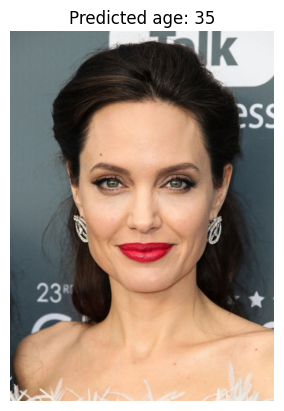

In [ ]:
!pip install deepface
!pip install opencv-python-headless
!pip install dlib

import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace
import urllib.request

image_url = "https://raw.githubusercontent.com/serengil/deepface/master/tests/dataset/img6.jpg"

image_path = "downloaded_image.jpg"
urllib.request.urlretrieve(image_url, image_path)

image = cv2.imread(image_path)

if image is None:
    raise FileNotFoundError(f"Unable to load image at path: {image_path}")

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

result = DeepFace.analyze(image_rgb, actions=['age'])

print(result)

if isinstance(result, list):
    result = result[0]

predicted_age = result["age"]
print(f"Predicted age: {predicted_age}")

plt.imshow(image_rgb)
plt.title(f"Predicted age: {predicted_age}")
plt.axis('off')
plt.show()


# Implement a system for personality detection from images.

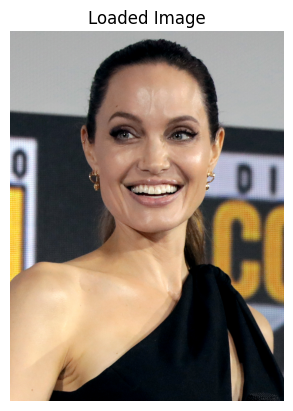

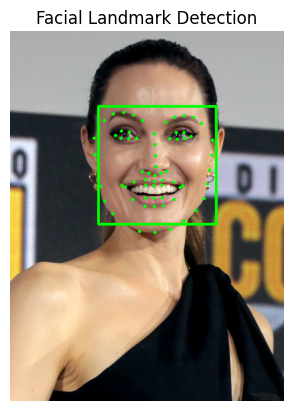

In [ ]:
# Installed Required Libraries
!pip install imutils dlib opencv-python matplotlib requests

import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
import requests
from io import BytesIO
import dlib

# Load image from a URL .png or jpg format
image_url = 'https://raw.githubusercontent.com/serengil/deepface/master/tests/dataset/img1.jpg'
response = requests.get(image_url)
image = np.array(bytearray(response.content), dtype=np.uint8)
image = cv2.imdecode(image, cv2.IMREAD_COLOR)

# Check if the image is loaded properly
if image is None:
    raise ValueError(f"Unable to load image from URL: {image_url}")

# Display the loaded image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Loaded Image")
plt.show()

# Download pre-trained model
model_url = 'https://github.com/davisking/dlib-models/raw/master/shape_predictor_68_face_landmarks.dat.bz2'
response = requests.get(model_url)
with open('shape_predictor_68_face_landmarks.dat.bz2', 'wb') as f:
    f.write(response.content)

# Extract the model
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2

# Load the dlib face detector
detector = dlib.get_frontal_face_detector()

# Load the dlib shape predictor
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

# Resize the image to have a width of 500 pixels
image = imutils.resize(image, width=500)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = detector(gray)
if not faces:
    raise ValueError("No faces detected in the image")

# Process each detected face
for face in faces:
    x1 = face.left()   # left point
    y1 = face.top()    # top point
    x2 = face.right()  # right point
    y2 = face.bottom() # bottom point

    # Draw a rectangle around the face
    cv2.rectangle(img=image, pt1=(x1, y1), pt2=(x2, y2), color=(0, 255, 0), thickness=3)

    # Get the landmarks/parts for the face
    landmarks = predictor(image=gray, box=face)

    # Loop through all the landmark points
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y

        # Draw a circle at each landmark point
        cv2.circle(img=image, center=(x, y), radius=3, color=(0, 255, 0), thickness=-1)

# Display the output
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide the axis
plt.title("Facial Landmark Detection")
plt.show()

# Implement a system for weather forecasting.

Mean Absolute Error: 3.742428488072083


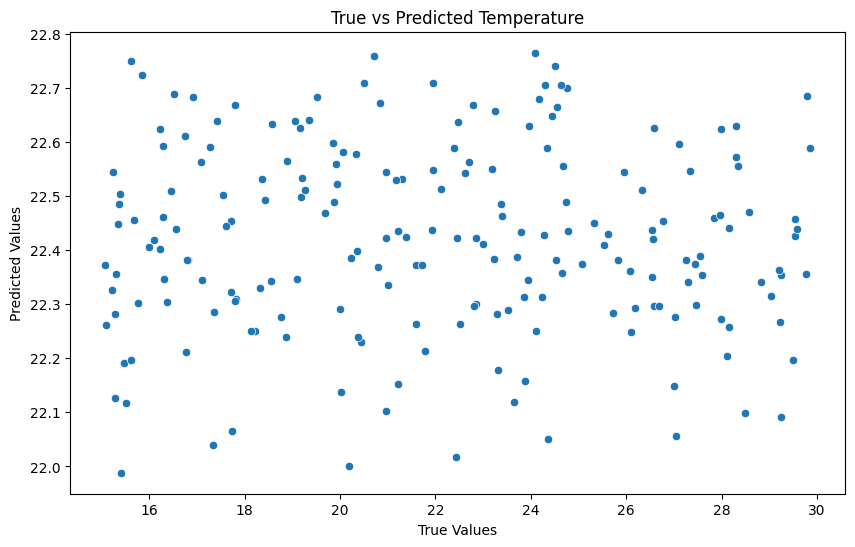

Predicted Temperature: 21.36°C


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic data
np.random.seed(42)
n_samples = 1000
dates = pd.date_range('2023-01-01', periods=n_samples, freq='H')

data = {
    'datetime': dates,
    'temperature': np.random.uniform(15, 30, size=n_samples),
    'humidity': np.random.uniform(30, 70, size=n_samples),
    'pressure': np.random.uniform(980, 1050, size=n_samples)
}

df = pd.DataFrame(data)

# Extract additional features
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month

# Target variable: temperature
X = df[['hour', 'day', 'month', 'humidity', 'pressure']]
y = df['temperature']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Plot true vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Temperature')
plt.show()

# Example prediction
example_data = np.array([[12, 15, 7, 50, 1013]])  # [hour, day, month, humidity, pressure]
example_data_scaled = scaler.transform(example_data)
predicted_temp = model.predict(example_data_scaled)
print(f'Predicted Temperature: {predicted_temp[0]:.2f}°C')


# Implement a system for customer segmentation.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


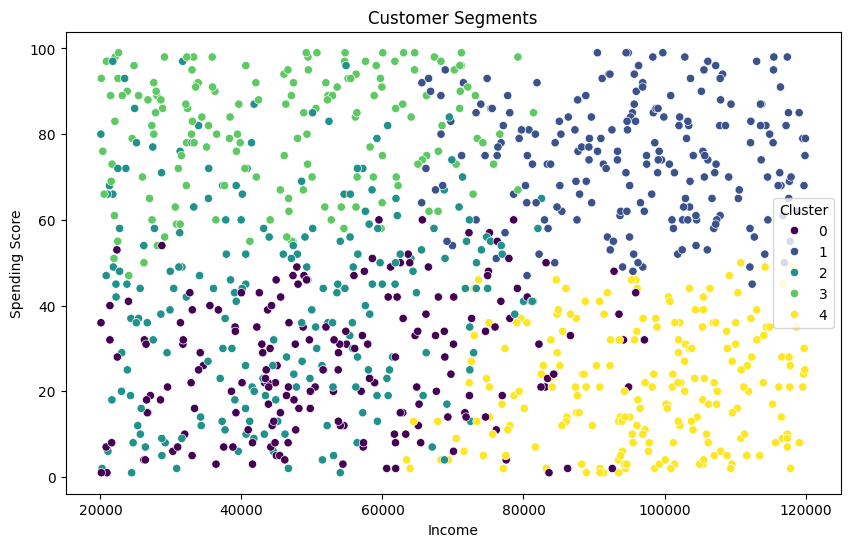

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Generate Synthetic Customer Data
np.random.seed(42)
n_samples = 1000

data = {
    'age': np.random.randint(18, 70, size=n_samples),
    'income': np.random.randint(20000, 120000, size=n_samples),
    'spending_score': np.random.randint(1, 100, size=n_samples)
}

df = pd.DataFrame(data)

# Preprocess the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the dataframe
df['cluster'] = clusters

# Visualize the Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='income', y='spending_score', hue='cluster', data=df, palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()



# Implement a system for traffic prediction.

Mean Absolute Error: 227.62321657877771


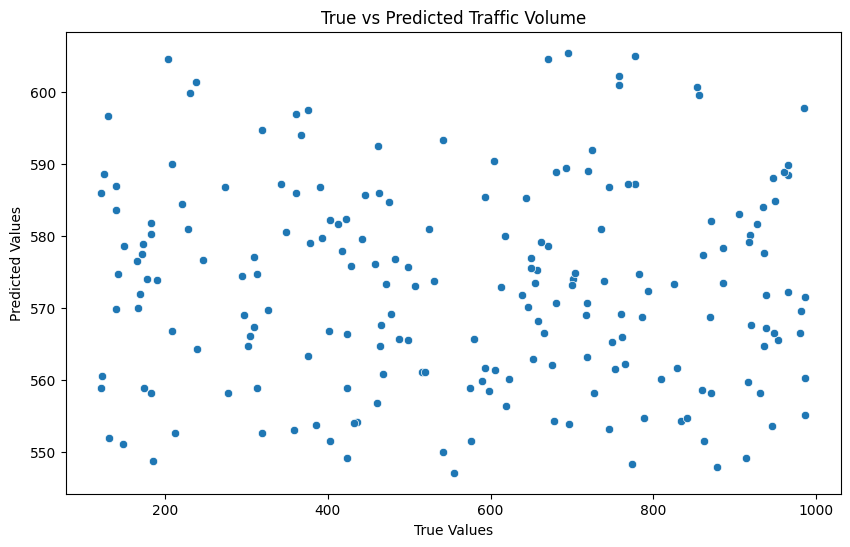

Predicted Traffic Volume: 562.92


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Generate Synthetic Traffic Data
np.random.seed(42)
n_samples = 1000

data = {
    'hour': np.random.randint(0, 24, size=n_samples),
    'day_of_week': np.random.randint(0, 7, size=n_samples),
    'weather': np.random.choice(['sunny', 'rainy', 'cloudy'], size=n_samples),
    'traffic_volume': np.random.randint(100, 1000, size=n_samples)
}

df = pd.DataFrame(data)

# Encode categorical features
df = pd.get_dummies(df, columns=['weather'], drop_first=True)

# Preprocess the Data
X = df[['hour', 'day_of_week', 'weather_rainy', 'weather_sunny']]
y = df['traffic_volume']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Visualize Results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Traffic Volume')
plt.show()

# Make Predictions
example_data = np.array([[14, 2, 0, 1]])  # [hour, day_of_week, weather_rainy, weather_sunny]
example_data_scaled = scaler.transform(example_data)
predicted_traffic_volume = model.predict(example_data_scaled)
print(f'Predicted Traffic Volume: {predicted_traffic_volume[0]:.2f}')
